In [1]:
# Importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Importing global plot styling
import matplotlib.style as style
style.use('ggplot')

In [3]:
# Reading in cleaned data
data = pd.read_csv('CSVs/census_walkscore_by_zip.csv')

# Converting zip codes to strings
data['Zipcode'] = data['Zipcode'].astype('object')

# Sorting data by walk score
data_walk_sorted = data.sort_values('Walk Score', ascending=False)

# Cleaning up walk score formatting
data_walk_sorted['Walk Score'] = round(data_walk_sorted['Walk Score'], 2)

# Adding columns to measure changes in time between the two census data sets
data_walk_sorted['Income Change'] = data_walk_sorted['Median Income 2018'] - data_walk_sorted['Median Income 2012']
data_walk_sorted['BIPOC Change'] = data_walk_sorted['BIPOC Population 2018'] - data_walk_sorted['BIPOC Population 2012']
data_walk_sorted['Population Change'] = data_walk_sorted['Population 2018'] - data_walk_sorted['Population 2012']
data_walk_sorted['Black Population Change'] = data_walk_sorted['Black Population 2018'] - data_walk_sorted['Black Population 2012']

# Measuring changes in median income

### Plotting income by score

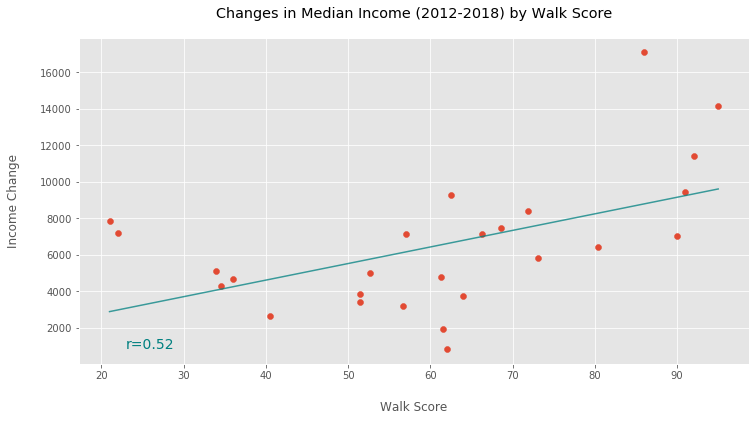

In [4]:
plt.figure(figsize=(12,6))

x = data_walk_sorted['Walk Score']
y = data_walk_sorted['Income Change']

plt.scatter(x, y)
plt.xlabel('Walk Score', labelpad=20)
plt.ylabel('Income Change', labelpad=20)
plt.title('Changes in Median Income (2012-2018) by Walk Score', pad=20)

(slope, intercept, rvalue, pvalue, stderr) = linregress(data_walk_sorted['Walk Score'], data_walk_sorted['Income Change'])
regress_values = data_walk_sorted['Walk Score'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(data_walk_sorted['Walk Score'], regress_values, color='teal', linestyle='solid', alpha=.75)
plt.annotate(f"r={round(rvalue, 2)}", (x.min() + 2, y.min() + 10), fontsize=14,color="teal")

path = f'Scatterplot Output/median_income.png'
plt.savefig(path, format='png')

plt.show()

### Looking for potential outliers

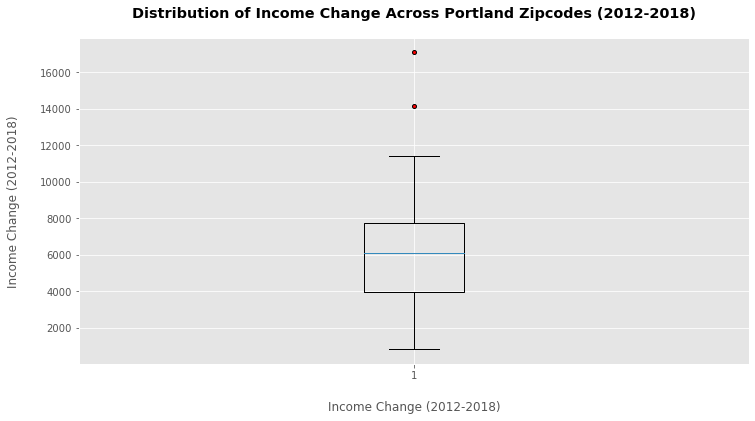

In [5]:
median_income_df = data_walk_sorted[['Zipcode', 'Walk Score', 'Income Change']]

markers = dict(marker='.', markerfacecolor='red', markersize=8)

fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.boxplot(median_income_df['Income Change'], flierprops=markers)
ax1.set_title('Distribution of Income Change Across Portland Zipcodes (2012-2018)', fontweight='bold', pad=20)
ax1.set_xlabel('Income Change (2012-2018)', labelpad=20, fontsize='large')
ax1.set_ylabel('Income Change (2012-2018)', labelpad=20, fontsize='large')

path = f'Scatterplot Output/median_income_boxplot.png'
plt.savefig(path, format='png')

plt.show()

### Re-plotting data with outliers removed

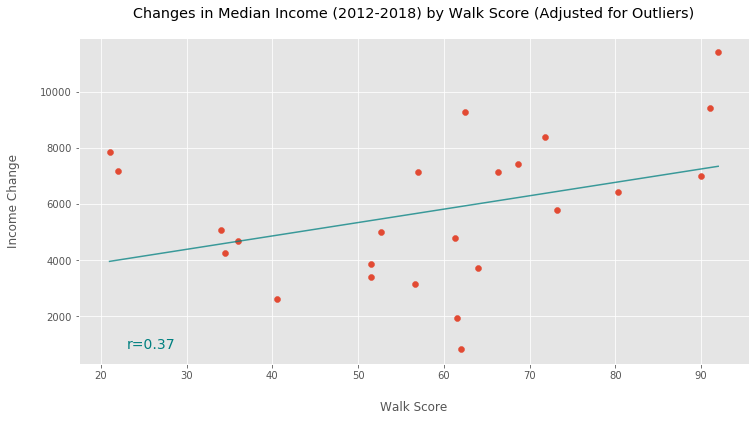

In [6]:
mi_no_outliers = median_income_df.loc[median_income_df['Income Change'] < 14000]

plt.figure(figsize=(12,6))

x = mi_no_outliers['Walk Score']
y = mi_no_outliers['Income Change']

plt.scatter(x, y)
plt.xlabel('Walk Score', labelpad=20)
plt.ylabel('Income Change', labelpad=20)
plt.title('Changes in Median Income (2012-2018) by Walk Score (Adjusted for Outliers)', pad=20)

(slope, intercept, rvalue, pvalue, stderr) = linregress(mi_no_outliers['Walk Score'], mi_no_outliers['Income Change'])
regress_values = mi_no_outliers['Walk Score'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(mi_no_outliers['Walk Score'], regress_values, color='teal', linestyle='solid', alpha=.75)
plt.annotate(f"r={round(rvalue, 2)}", (x.min() + 2, y.min() + 10), fontsize=14,color="teal")

path = f'Scatterplot Output/median_income_no_outliers.png'
plt.savefig(path, format='png')

plt.show()

# Measuring changes in population (2012-2018)

### General population change

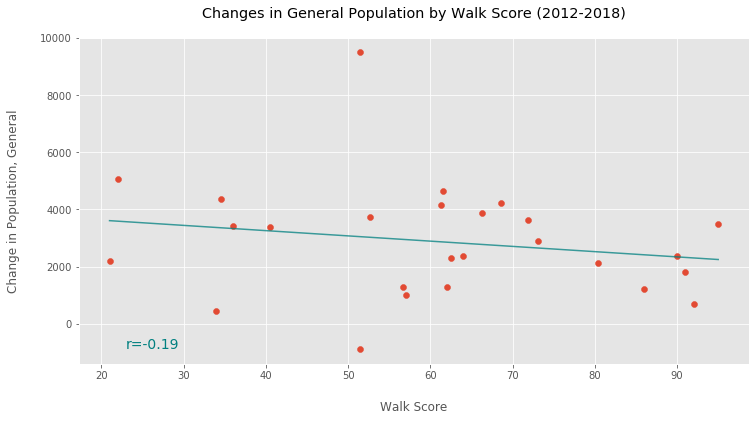

In [7]:
plt.figure(figsize=(12,6))

x = data_walk_sorted['Walk Score']
y = data_walk_sorted['Population Change']

plt.scatter(x, y)
plt.xlabel('Walk Score', labelpad=20)
plt.ylabel('Change in Population, General', labelpad=20)
plt.title('Changes in General Population by Walk Score (2012-2018)', pad=20)

(slope, intercept, rvalue, pvalue, stderr) = linregress(data_walk_sorted['Walk Score'], data_walk_sorted['Population Change'])
regress_values = data_walk_sorted['Walk Score'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(data_walk_sorted['Walk Score'], regress_values, color='teal', linestyle='solid', alpha=.75)
plt.annotate(f"r={round(rvalue, 2)}", (x.min() + 2, y.min() + 10), fontsize=14,color="teal")

path = f'Scatterplot Output/general_pop.png'
plt.savefig(path, format='png')

plt.show()

### BIPOC communities population change

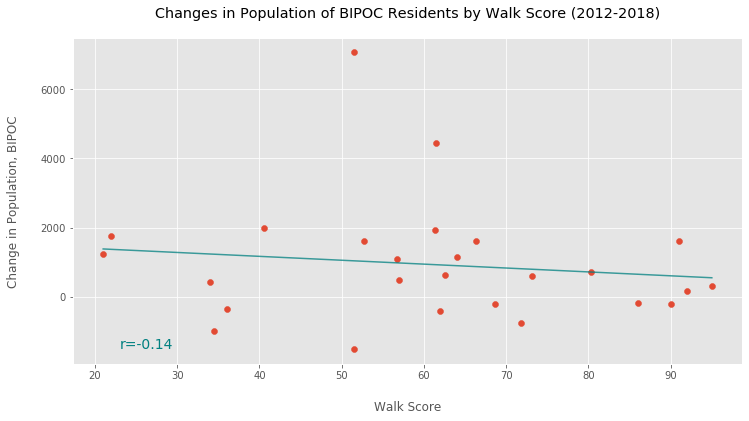

In [8]:
plt.figure(figsize=(12,6))

x = data_walk_sorted['Walk Score']
y = data_walk_sorted['BIPOC Change']

plt.scatter(x, y)
plt.xlabel('Walk Score', labelpad=20)
plt.ylabel('Change in Population, BIPOC', labelpad=20)
plt.title('Changes in Population of BIPOC Residents by Walk Score (2012-2018)', pad=20)

(slope, intercept, rvalue, pvalue, stderr) = linregress(data_walk_sorted['Walk Score'], data_walk_sorted['BIPOC Change'])
regress_values = data_walk_sorted['Walk Score'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(data_walk_sorted['Walk Score'], regress_values, color='teal', linestyle='solid', alpha=.75)
plt.annotate(f"r={round(rvalue, 2)}", (x.min() + 2, y.min() + 10), fontsize=14,color="teal")

path = f'Scatterplot Output/bipoc_pop.png'
plt.savefig(path, format='png')

plt.show()

### Black population change

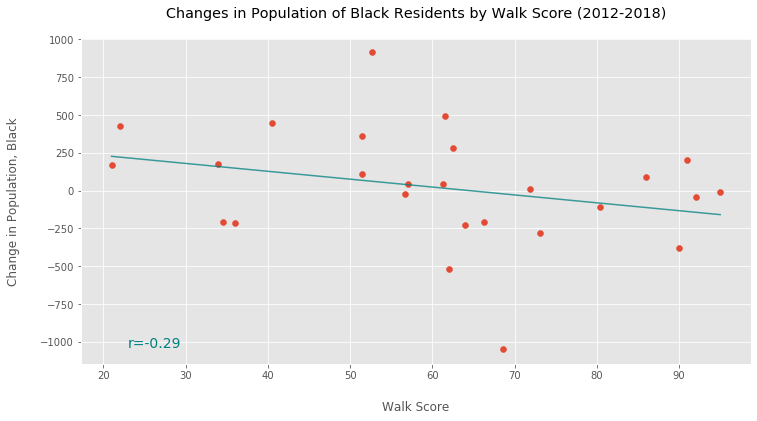

In [9]:
plt.figure(figsize=(12,6))

x = data_walk_sorted['Walk Score']
y = data_walk_sorted['Black Population Change']

plt.scatter(x, y)
plt.xlabel('Walk Score', labelpad=20)
plt.ylabel('Change in Population, Black', labelpad=20)
plt.title('Changes in Population of Black Residents by Walk Score (2012-2018)', pad=20)

(slope, intercept, rvalue, pvalue, stderr) = linregress(data_walk_sorted['Walk Score'], data_walk_sorted['Black Population Change'])
regress_values = data_walk_sorted['Walk Score'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(data_walk_sorted['Walk Score'], regress_values, color='teal', linestyle='solid', alpha=.75)
plt.annotate(f"r={round(rvalue, 2)}", (x.min() + 2, y.min() + 10), fontsize=14,color="teal")

path = f'Scatterplot Output/black_pop.png'
plt.savefig(path, format='png')

plt.show()

# Changes in ratio of Black residents to general population (2012-2018)

In [10]:
percentage_black_df = data_walk_sorted[['Zipcode', 'Walk Score', 'Population Change', 'Black Population Change']]

In [11]:
percentage_black_df['Black Population Ratio (2012)'] = round(abs(data_walk_sorted['Black Population 2012']) / 
data_walk_sorted['Population 2012'] * 100, 2)

percentage_black_df['Black Population Ratio (2018)'] = round(abs(data_walk_sorted['Black Population 2018']) / 
data_walk_sorted['Population 2018'] * 100, 2)

/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


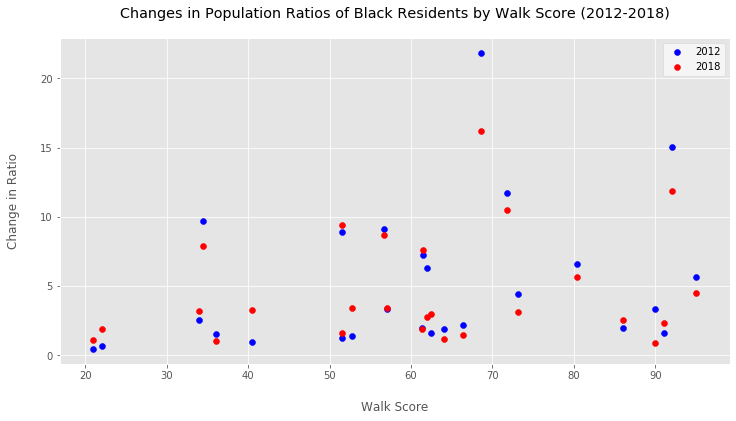

In [12]:
fig = plt.figure(figsize=(12,6))

x = percentage_black_df['Walk Score']
y = percentage_black_df['Black Population Ratio (2012)']
z= percentage_black_df['Black Population Ratio (2018)']

ax1 = fig.add_subplot(111)

ax1.scatter(x, y, c='b', label='2012')
ax1.scatter(x, z, c='r', label='2018')
plt.xlabel('Walk Score', labelpad=20)
plt.ylabel('Change in Ratio', labelpad=20)
plt.title('Changes in Population Ratios of Black Residents by Walk Score (2012-2018)', pad=20)

ax1.legend(loc='best', facecolor='#fafafa')

path = f'Scatterplot Output/black_pop_ratio_stacked.png'
plt.savefig(path, format='png')

plt.show()

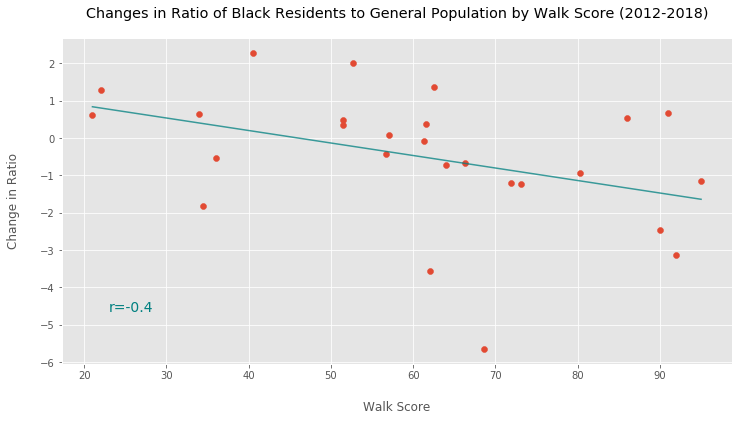

In [13]:
plt.figure(figsize=(12,6))

x = percentage_black_df['Walk Score']
y = percentage_black_df['Black Population Ratio (2018)']-percentage_black_df['Black Population Ratio (2012)']

plt.scatter(x, y)
plt.xlabel('Walk Score', labelpad=20)
plt.ylabel('Change in Ratio', labelpad=20)
plt.title('Changes in Ratio of Black Residents to General Population by Walk Score (2012-2018)', pad=20)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_values, color='teal', linestyle='solid', alpha=.75)
plt.annotate(f"r={round(rvalue, 2)}", (x.min() + 2, y.min() + 1), fontsize=14,color="teal")

path = f'Scatterplot Output/black_ratio.png'
plt.savefig(path, format='png')

plt.show()